# **1. Pendahuluan**

Olist merupakan perusahaan B2B2C (Business-to-Business-to-Customer) yang menawarkan jasa/layanan untuk membantu UKM (seller) menjual produk mereka secara online, bukan sebagai marketplace langsung seperti Shopee/Tokopedia. Di Shopee, retailer (penjual) bisa menjual produk mereka langsung di platform Shopee sendiri, tanpa perlu melalui perantara seperti Olist. **Maka dari itu, saya akan melakukan analisis dengan menentukan tujuan bisnis terlebih dahulu memakai metode SMART sebagai berikut:**

Untuk memahami kesehatan finansial bisnis e-commerce, saya akan menghitung total pendapatan kotor (GMV), jumlah transaksi, AOV, dan rata-rata waktu antar pesanan dari 2016 hingga 2018 untuk mengevaluasi pertumbuhan dan efisiensi penjualan.

Untuk menganalisis perilaku dan retensi pelanggan, saya akan melakukan cohort analysis terhadap data pelanggan selama 2016 hingga 2018 untuk mengukur tingkat retensi kuartal dan tren pembelian berulang.

Untuk mengevaluasi kinerja operasional dan mitra (penjual), saya akan menilai tren penjualan musiman dengan membandingkan volume penjualan bulanan dari 2017 hingga 2018 untuk mengidentifikasi pola temporal.

Dataset ini digunakan dari Brazilian E-Commerce Public Dataset by Olist yang tersedia di Kaggle, dilisensikan di bawah **CC BY-NC-SA 4.0**.
Tautan ke dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


# **2. Data Loading**

In [ ]:
import pandas as pd

# Definisikan base path
base_path = '/content/drive/MyDrive/archive/'

# Baca file CSV
orders = pd.read_csv(base_path + 'olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items = pd.read_csv(base_path + 'olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
customers = pd.read_csv(base_path + 'olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# **3. Data Cleaning**

## Tabel Orders

In [ ]:
# Menampilkan ringkasan informasi dari dataset
orders.info()
# Menampilkan statistik deskriptif dari dataset
orders.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
# Mengubah tipe data kolom waktu ke tanggal
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values_orders = orders.isnull().sum()
missing_values_orders[missing_values_orders > 0]

,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965


Sebagai informasi jumlah data pada orders ini berjumlah 99441 baris sehingga jika salah satu fitur memiliki missing value lebih dari 1000, dapat saya asumsikan terlalu banyak data yang hilang.

In [ ]:
# Mengecek nilai unik order_status
orders['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
# Memastikan order_id benar-benar unik
orders['order_id'].is_unique

True

In [ ]:
# Mengatasi Missing Value
less = missing_values_orders[missing_values_orders < 1000].index
over = missing_values_orders[missing_values_orders > 1000].index
print(less)
print(over)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_estimated_delivery_date'],
      dtype='object')
Index(['order_delivered_carrier_date', 'order_delivered_customer_date'], dtype='object')


In [ ]:
# Mengatasi Missing Value dengan menghapus baris yang memiliki missing values pada kolom pengiriman
orders.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

# Memeriksa jumlah nilai yang hilang di setiap kolom setelah penghapusan
missing_values_after_drop = orders.isnull().sum()
print("Jumlah missing values setelah penghapusan:")
print(missing_values_after_drop[missing_values_after_drop > 0])

Jumlah missing values setelah penghapusan:
order_approved_at    14
dtype: int64


In [ ]:
# Mengecek nilai unik order_status
orders['order_status'].value_counts()

,count
order_status,
delivered,96469
canceled,6


In [ ]:
# Mengidentifikasi baris duplikat
duplicates = orders.duplicated()

print("Baris duplikat:")
print(orders[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


## Tabel Order Items

In [ ]:
# Menampilkan ringkasan informasi dari dataset
order_items.info()
# Menampilkan statistik deskriptif dari dataset
order_items.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [ ]:
# Mengubah tipe data kolom waktu ke tanggal
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values_order_items = order_items.isnull().sum()
missing_values_order_items[missing_values_order_items > 0]

,0


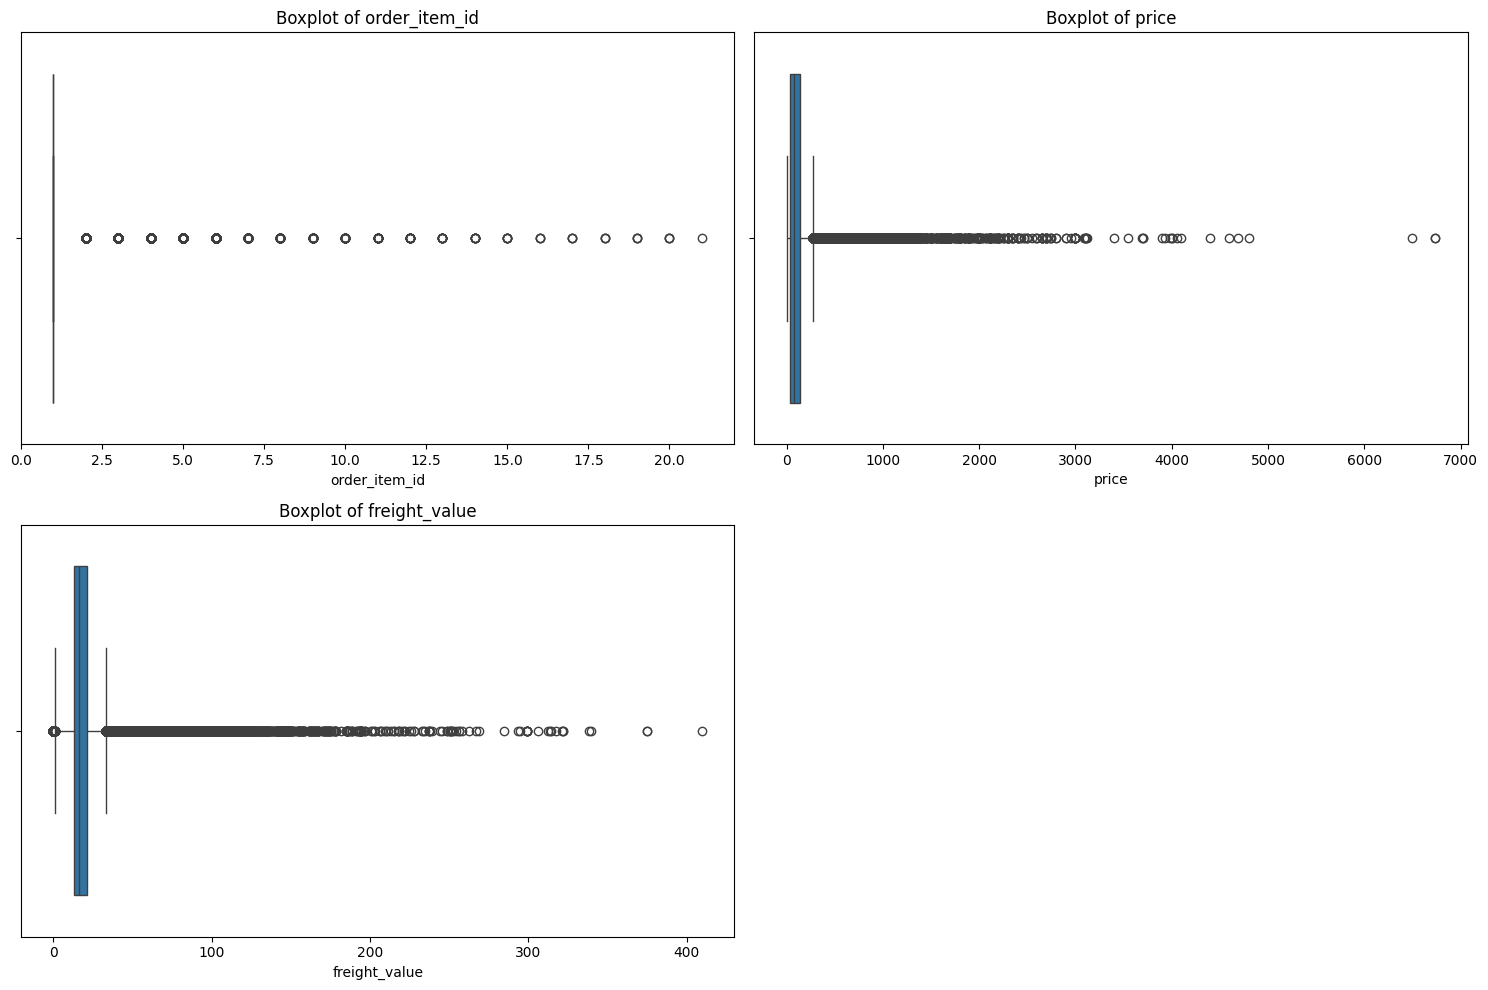

In [ ]:
# Mengatasi Outliers
import seaborn as sns
import matplotlib.pyplot as plt
import math

numeric_features = order_items.select_dtypes(include=['number']).columns

# Tentukan jumlah baris dan kolom subplot (misalnya 2 kolom)
n_cols = 2
n_rows = math.ceil(len(numeric_features) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=order_items[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
# Menghitung jumlah item yang sangat tidak biasa
order_items.groupby('order_id')['order_item_id'].max().value_counts()

,count
order_item_id,
1,88863
2,7516
3,1322
4,505
5,204
6,198
7,22
8,8
10,8


maksudnya: saya lagi mencari distribusi pesanan yang berisi banyak item, dan bisa dipakai untuk mendeteksi order yang tidak umum (misalnya 10+ item dalam satu transaksi).

In [ ]:
order_items.tail(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [ ]:
# Menghitung jumlah unit per produk dalam order
order_items.groupby(['order_id', 'product_id']).size().reset_index(name='quantity').tail(10)

,order_id,product_id,quantity
102415,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,1
102416,fffb0b1a50e65c449020434fa835e078,e7be84ea9462aac5e2b0b08eb35ba7f1,1
102417,fffb2ef8874127f75b52b643880fd7e0,ebceb9726cf5c6187b48e17fe58747b0,1
102418,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,4
102419,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,1
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1
102424,fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,1


<Axes: ylabel='Frequency'>

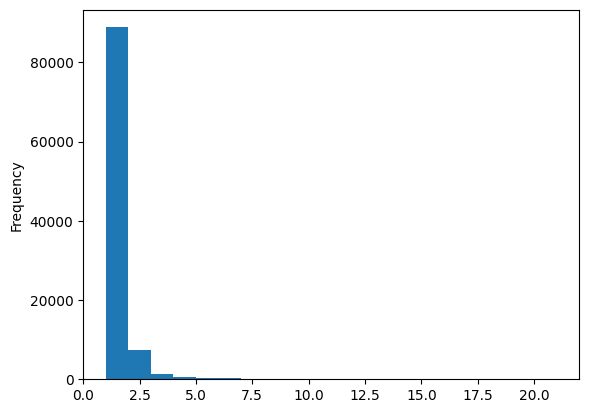

In [ ]:
# Melihat distribusi jumlah item per order
order_item_counts = order_items.groupby('order_id')['order_item_id'].max()
order_item_counts.describe()
order_item_counts.plot.hist(bins=20)


In [ ]:
# Mengidentifikasi outliers menggunakan IQR
numeric_features_new = order_items.select_dtypes(include=['float64']).columns
Q1 = order_items[numeric_features_new].quantile(0.25)
Q3 = order_items[numeric_features_new].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            95.00
freight_value     8.07
dtype: float64


**NOTE**

Order dengan jumlah item tinggi adalah outlier secara distribusi, tapi masih normal terjadi dalam konteks bisnis sehingga kolom price dan freight_value normal terjadi outlier .

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = order_items.duplicated()

print("Baris duplikat:")
print(order_items[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


## Tabel Customers

In [ ]:
# Menampilkan ringkasan informasi dari dataset
customers.info()
# Menampilkan statistik deskriptif dari dataset
customers.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
# Mengidentifikasi baris duplikat
duplicates = customers.duplicated()

print("Baris duplikat:")
print(customers[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


# **4. Exploratory Data Analysis**

In [ ]:
import duckdb

# Load the data into a DuckDB table
duckdb.sql("CREATE OR REPLACE TABLE orders AS SELECT * FROM orders")
duckdb.sql("CREATE OR REPLACE TABLE order_items AS SELECT * FROM order_items")
duckdb.sql("CREATE OR REPLACE TABLE customers AS SELECT * FROM customers")


# Query langsung dari file CSV di path
query = """
CREATE OR REPLACE TABLE olist AS
SELECT
    o.order_id,
    o.customer_id,
    o.order_status,
    o.order_purchase_timestamp,
    o.order_approved_at,
    o.order_delivered_carrier_date,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    oi.order_item_id,
    oi.product_id,
    oi.seller_id,
    oi.shipping_limit_date,
    oi.price,
    oi.freight_value,
    c.customer_unique_id,
    c.customer_city,
    c.customer_state
FROM orders o
INNER JOIN order_items oi ON o.order_id = oi.order_id
INNER JOIN customers c ON o.customer_id = c.customer_id;
"""
duckdb.sql(query)  # Execute the update query

review_orders = duckdb.sql("SELECT * FROM olist").to_df()
review_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,80bb27c7c16e8f973207a5086ab329e2,congonhinhas,PR


In [ ]:
# Menampilkan ringkasan informasi dari dataset
review_orders.info()
# Menampilkan statistik deskriptif dari dataset
review_orders.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110195 entries, 0 to 110194
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110195 non-null  object        
 1   customer_id                    110195 non-null  object        
 2   order_status                   110195 non-null  object        
 3   order_purchase_timestamp       110195 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110195 non-null  datetime64[ns]
 6   order_delivered_customer_date  110195 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110195 non-null  datetime64[ns]
 8   order_item_id                  110195 non-null  int64         
 9   product_id                     110195 non-null  object        
 10  seller_id                      110195 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_city,customer_state
count,110195,110195,110195,110195,110180,110195,110195,110195,110195.000000,110195,110195,110195,110195.000000,110195.000000,110195,110195,110195
unique,96475,96475,2,NaN,NaN,NaN,NaN,NaN,NaN,32213,2970,NaN,NaN,NaN,93355,4085,27
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,c8460e4251689ba205045f3ea17884a1,sao paulo,SP
freq,21,21,110188,NaN,NaN,NaN,NaN,NaN,NaN,520,1996,NaN,NaN,NaN,24,17402,46442
mean,NaN,NaN,NaN,2018-01-02 02:06:03.009673728,2018-01-02 13:40:14.266463744,2018-01-05 08:54:54.504523520,2018-01-14 13:26:06.940922624,2018-01-25 21:26:05.286991104,1.198194,NaN,NaN,2018-01-08 16:34:52.733572608,119.975644,19.948576,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,NaN,2016-09-19 23:11:33,0.850000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-15 03:48:04,2017-09-15 14:25:19.750000128,2017-09-18 22:17:10,2017-09-26 20:09:37,2017-10-06 00:00:00,1.000000,NaN,NaN,2017-09-21 14:35:11.500000,39.900000,13.080000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-21 09:11:53,2018-01-22 13:56:54,2018-01-24 18:45:17,2018-02-02 20:58:30,2018-02-16 00:00:00,1.000000,NaN,NaN,2018-01-26 19:36:36,74.900000,16.260000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 15:29:52.500000,2018-05-05 22:30:47.500000,2018-05-08 14:18:00,2018-05-15 20:09:52,2018-05-28 00:00:00,1.000000,NaN,NaN,2018-05-10 20:15:18.500000,134.170000,21.150000,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,NaN


In [ ]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = review_orders.isnull().sum()
missing_values_percentage = (missing_values / len(review_orders)) * 100

missing_data = pd.DataFrame({'Jumlah Missing Values': missing_values,
                             'Persentase Missing Values': missing_values_percentage}).sort_values(by='Jumlah Missing Values', ascending=False)

missing_data[missing_data['Jumlah Missing Values'] > 0] # Menampilkan kolom dengan missing values

,Jumlah Missing Values,Persentase Missing Values
order_approved_at,15,0.013612


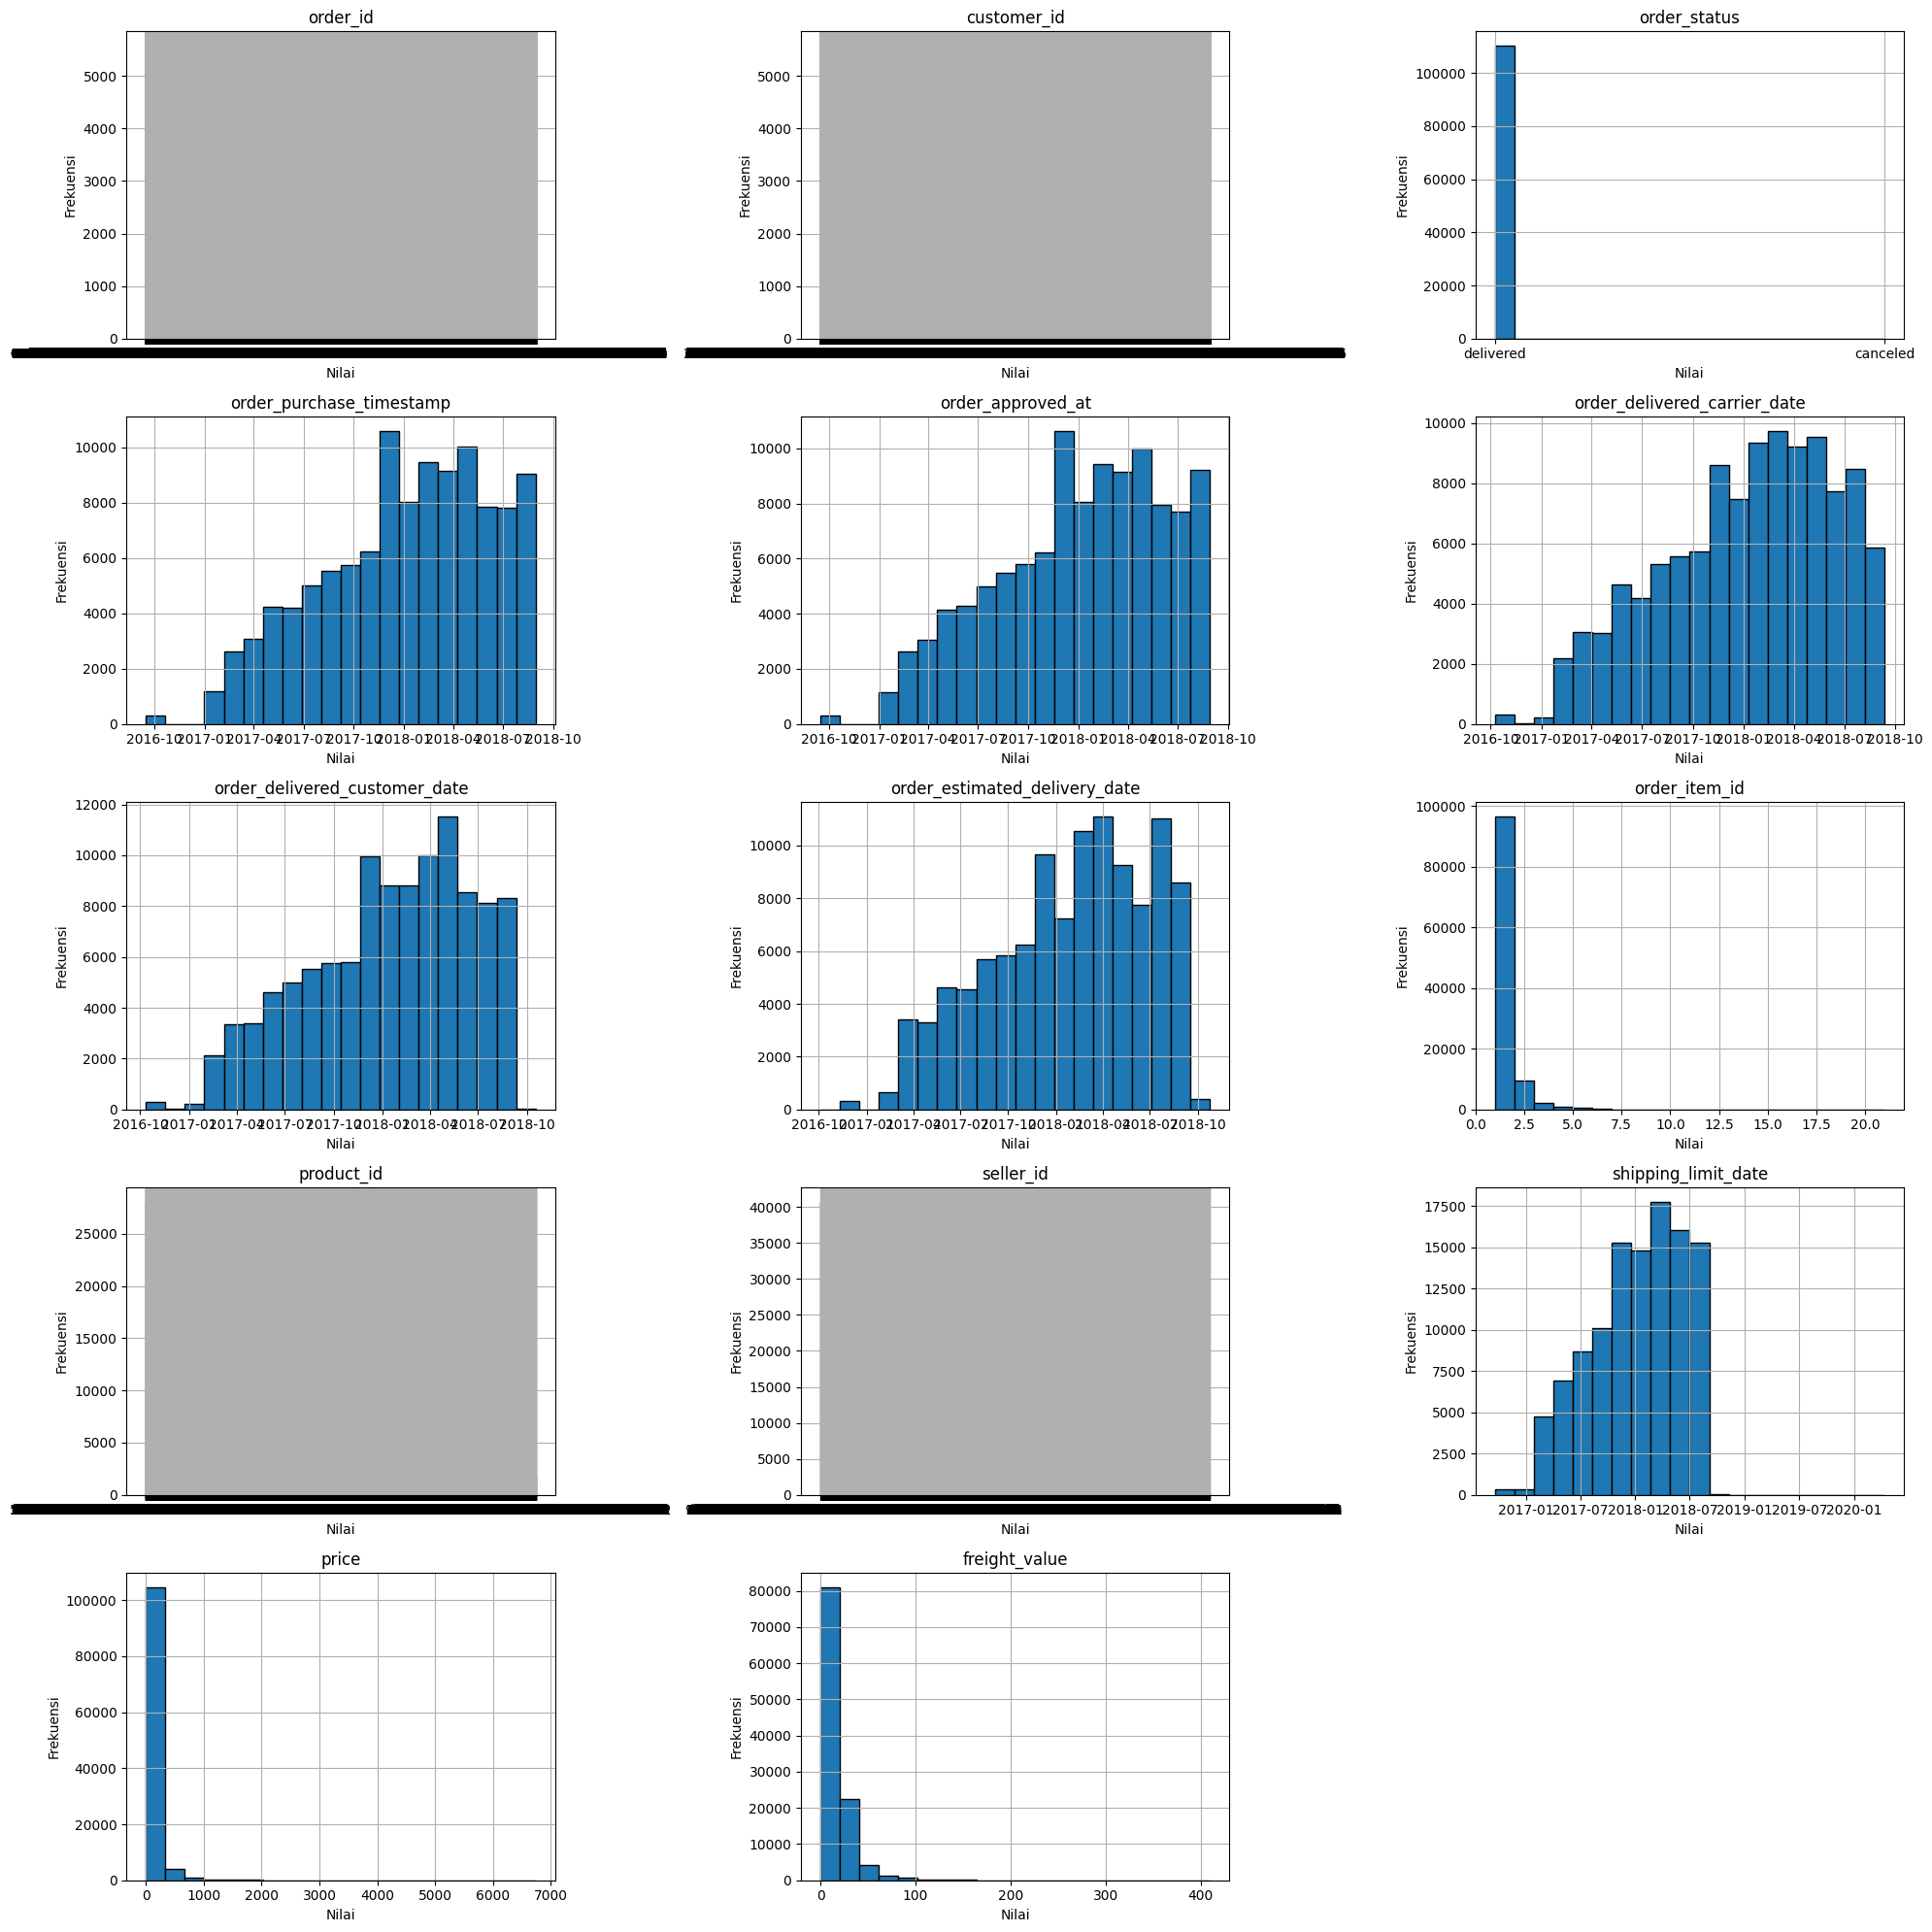

In [ ]:
# Menghitung jumlah variabel
num_vars = review_orders.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3 # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols) # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(review_orders.columns):
    review_orders[column].hist(ax=axes[i], bins = 20, edgecolor = 'black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range (i+1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Kesimpulan dari histogram ini:

* Dataset memiliki banyak NaN/missing values pada kolom waktu.
* Variabel numerik seperti price dan freight_value butuh transformasi (misalnya log transform) jika mau dipakai untuk modeling.
* Variabel kategorikal order_status sangat tidak seimbang (dominan delivered).
* ID-related columns tidak relevan untuk histogram.
* Ada indikasi outlier pada harga produk dan ongkos kirim.

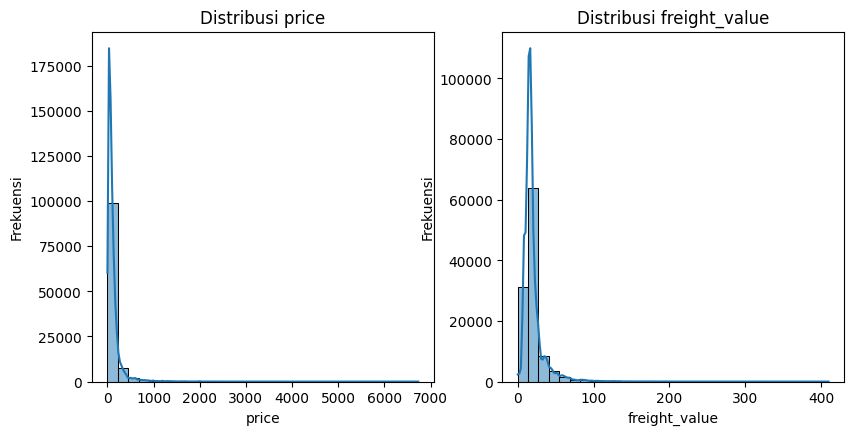

In [ ]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['price', 'freight_value']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(review_orders[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout
plt.show()

* Price: Distribusi harga sangat skewed ke kanan (right-skewed), mayoritas produk berharga murah (< 1000), hanya sedikit sekali yang mahal (hingga > 5000).
* Freight_value (ongkos kirim): Juga sangat skewed ke kanan. Mayoritas ongkos kirim < 100, tetapi ada beberapa outlier > 400.

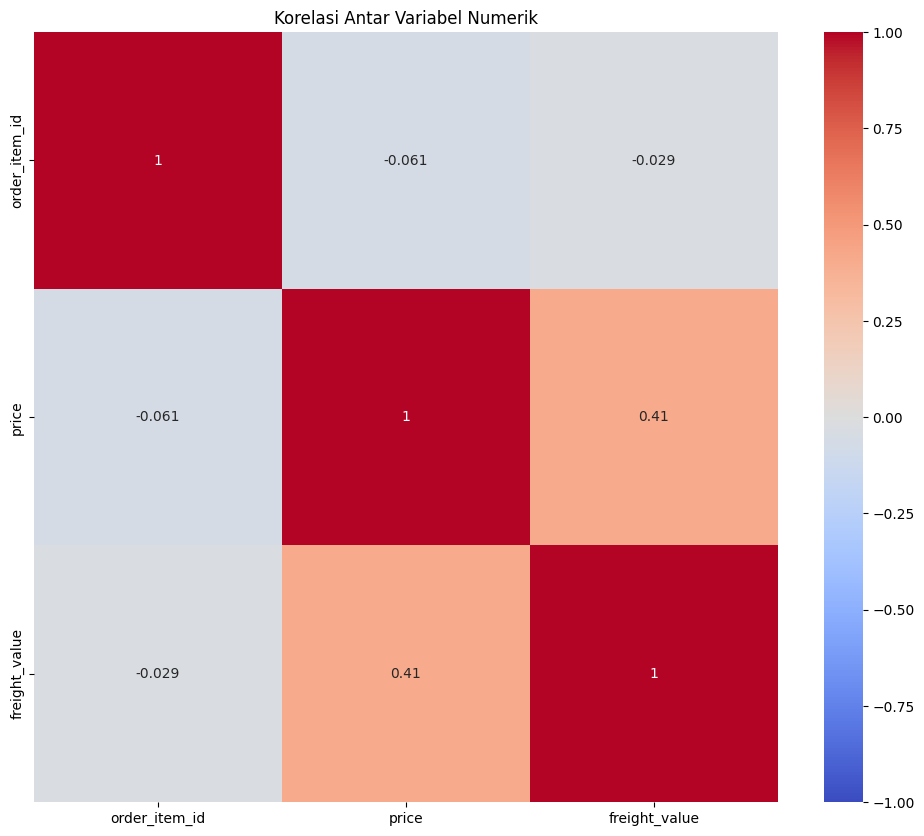

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12,10))
numeric_review_orders = review_orders.select_dtypes(include=['number'])
correlation_matrix = numeric_review_orders.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

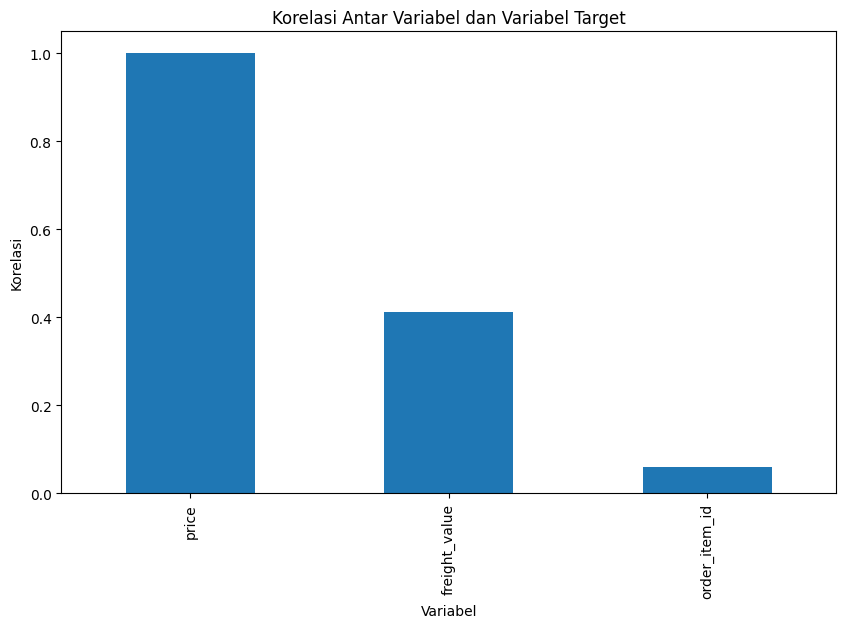

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel numerik lainnya
target_corr = numeric_review_orders.corr()['price']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title('Korelasi Antar Variabel dan Variabel Target')
plt.xlabel('Variabel')
plt.ylabel('Korelasi')
plt.show()

Kesimpulan:
* Variabel yang punya hubungan yang agak signifikan hanyalah price dengan freight_value. Interpretasinya: produk dengan harga lebih mahal cenderung memiliki biaya ongkir yang lebih tinggi juga, meskipun hubungannya tidak linear sempurna.
* Variabel order_item_id sebaiknya tidak dipakai sebagai variabel prediktor dalam model machine learning karena tidak informatif secara numerik.
* Jika analisis dilanjutkan, mungkin lebih baik fokus pada feature engineering dari variabel waktu (delivery time, approval time, dll.) atau kategori (status pesanan, seller, dll.) ketimbang berharap dari korelasi numerik sederhana ini.

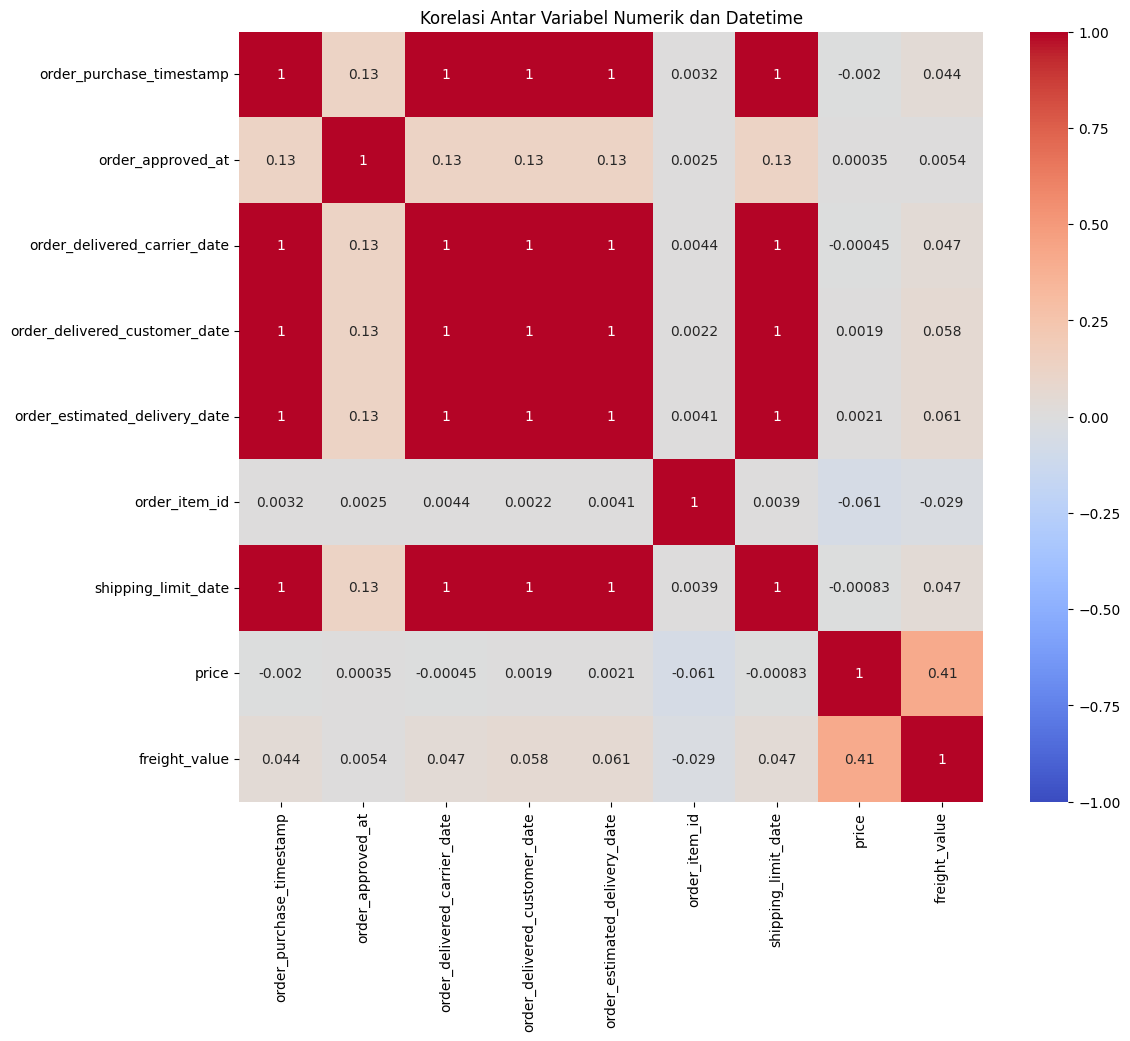

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik dan datetime
numeric_datetime_review_orders = review_orders.select_dtypes(include=['number', 'datetime64[ns]'])

# Kalau mau tetap hitung korelasi
# Perlu konversi datetime ke angka (misalnya pakai .astype('int64'))
numeric_datetime_review_orders = numeric_datetime_review_orders.apply(
    lambda x: x.astype('int64') if x.dtype == 'datetime64[ns]' else x
)

# Hitung matriks korelasi
correlation_matrix = numeric_datetime_review_orders.corr()

# Visualisasi heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Antar Variabel Numerik dan Datetime')
plt.show()


Dari heatmap ini terlihat ada masalah interpretasi:

Datetime dikonversi ke angka mentah (nanoseconds since epoch)
* Hasilnya semua tanggal (order_purchase_timestamp, order_delivered_customer_date, dst.) jadi punya korelasi sangat tinggi (mendekati 1) satu sama lain.
* Itu bukan berarti ada insight yang kuat, tapi lebih karena semua tanggal mengikuti timeline yang sama (tahun 2016–2018).

Korelasi dengan price dan freight_value sangat kecil
* Artinya, harga produk maupun ongkos kirim tidak dipengaruhi langsung oleh kapan pesanan dilakukan.

Masalah interpretasi
* Korelasi mentah antar tanggal tidak terlalu bermakna. Yang lebih berguna justru kalau diolah tanggal itu menjadi fitur turunan (feature engineering).

In [ ]:
import pandas as pd

# Pastikan kolom datetime sudah dalam format datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date'
]

for col in date_cols:
    review_orders[col] = pd.to_datetime(review_orders[col], errors='coerce')

# Feature engineering dari datetime
review_orders['purchase_hour'] = review_orders['order_purchase_timestamp'].dt.hour
review_orders['purchase_dayofweek'] = review_orders['order_purchase_timestamp'].dt.dayofweek  # 0=Senin, 6=Minggu
review_orders['purchase_month'] = review_orders['order_purchase_timestamp'].dt.month

# Lama waktu approval (dalam menit)
review_orders['approval_time_minutes'] = (
    (review_orders['order_approved_at'] - review_orders['order_purchase_timestamp']).dt.total_seconds() / 60
)

# Lama waktu pengiriman ke customer (dalam hari)
review_orders['delivery_time_days'] = (
    (review_orders['order_delivered_customer_date'] - review_orders['order_purchase_timestamp']).dt.days
)

# Lama waktu dari carrier menerima barang hingga customer terima (dalam hari)
review_orders['carrier_to_customer_days'] = (
    (review_orders['order_delivered_customer_date'] - review_orders['order_delivered_carrier_date']).dt.days
)

# Perbedaan antara estimasi dan realisasi pengiriman (dalam hari)
review_orders['delay_vs_estimated'] = (
    (review_orders['order_estimated_delivery_date'] - review_orders['order_delivered_customer_date']).dt.days
)

# Lama waktu maksimal yang diberikan seller untuk mengirim barang
review_orders['shipping_limit_days'] = (
    (review_orders['shipping_limit_date'] - review_orders['order_purchase_timestamp']).dt.days
)

# Cek hasil kolom baru
review_orders[[
    'purchase_hour',
    'purchase_dayofweek',
    'purchase_month',
    'approval_time_minutes',
    'delivery_time_days',
    'carrier_to_customer_days',
    'delay_vs_estimated',
    'shipping_limit_days'
]].head()


,purchase_hour,purchase_dayofweek,purchase_month,approval_time_minutes,delivery_time_days,carrier_to_customer_days,delay_vs_estimated,shipping_limit_days
0,10,0,10,10.700000,8,6,7,4
1,20,1,7,1842.833333,13,12,5,5
2,8,2,8,16.566667,9,9,17,5
3,21,1,2,61.833333,2,1,9,5
4,21,6,7,13.133333,16,14,5,4


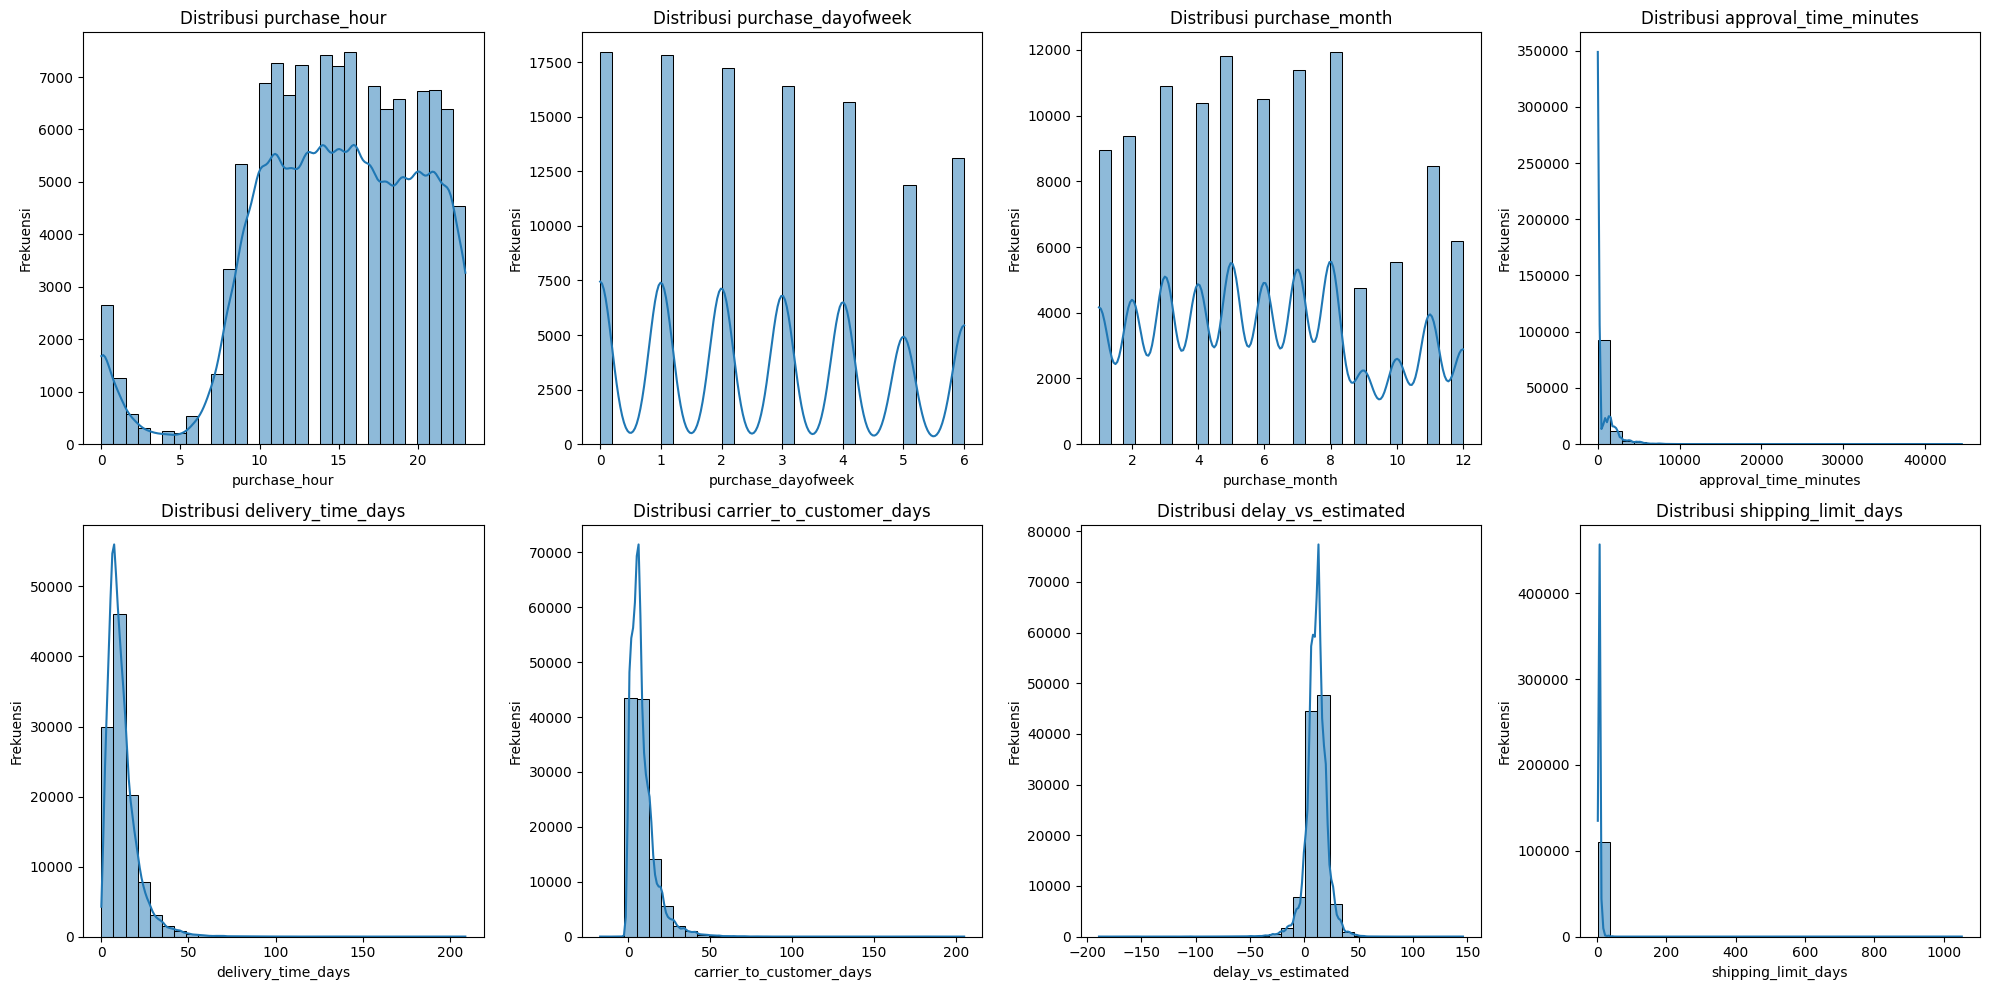

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya kita mau plot 8 fitur
columns_to_plot = [
    'purchase_hour',
    'purchase_dayofweek',
    'purchase_month',
    'approval_time_minutes',
    'delivery_time_days',
    'carrier_to_customer_days',
    'delay_vs_estimated',
    'shipping_limit_days'
]

# Tentukan jumlah baris dan kolom subplot (misalnya 2 baris x 4 kolom)
n_rows, n_cols = 2, 4

plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(review_orders[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


purchase_hour
* Mayoritas transaksi terjadi mulai jam 9 pagi hingga 10 malam, puncaknya sore–malam.
* Hampir tidak ada transaksi dini hari (jam 1–5).

purchase_dayofweek
* Transaksi cukup merata sepanjang minggu, tapi ada sedikit penurunan di hari Sabtu (5).
* Artinya orang lebih sering belanja di weekday.

purchase_month
* Distribusi cenderung stabil, tapi terlihat ada kenaikan di bulan Agustus.
* Bisa jadi terkait promo musiman.

approval_time_minutes
* Sangat skewed ke kanan → mayoritas order disetujui sangat cepat (< 60 menit).
* Ada beberapa outlier hingga puluhan ribu menit (berhari-hari).

delivery_time_days
* Rata-rata pengiriman sekitar 10–20 hari, tapi ada ekor panjang (hingga >100 hari).
* Menunjukkan adanya kasus pengiriman sangat lama.

carrier_to_customer_days
* Distribusinya mirip dengan delivery_time_days, tapi lebih kecil.
* Wajar, karena waktu ini hanya mencakup pengiriman dari carrier ke customer, bukan dari purchase.

delay_vs_estimated
* Distribusi terkonsentrasi di sekitar 0, artinya sebagian besar sesuai estimasi.
* Ada keterlambatan (positif) dan juga kasus lebih cepat dari estimasi (negatif).

shipping_limit_days
* Sebagian besar seller memberikan batas pengiriman pendek (sekitar 2–5 hari).
* Ada outlier sampai ratusan hari, kemungkinan error data atau kasus khusus.

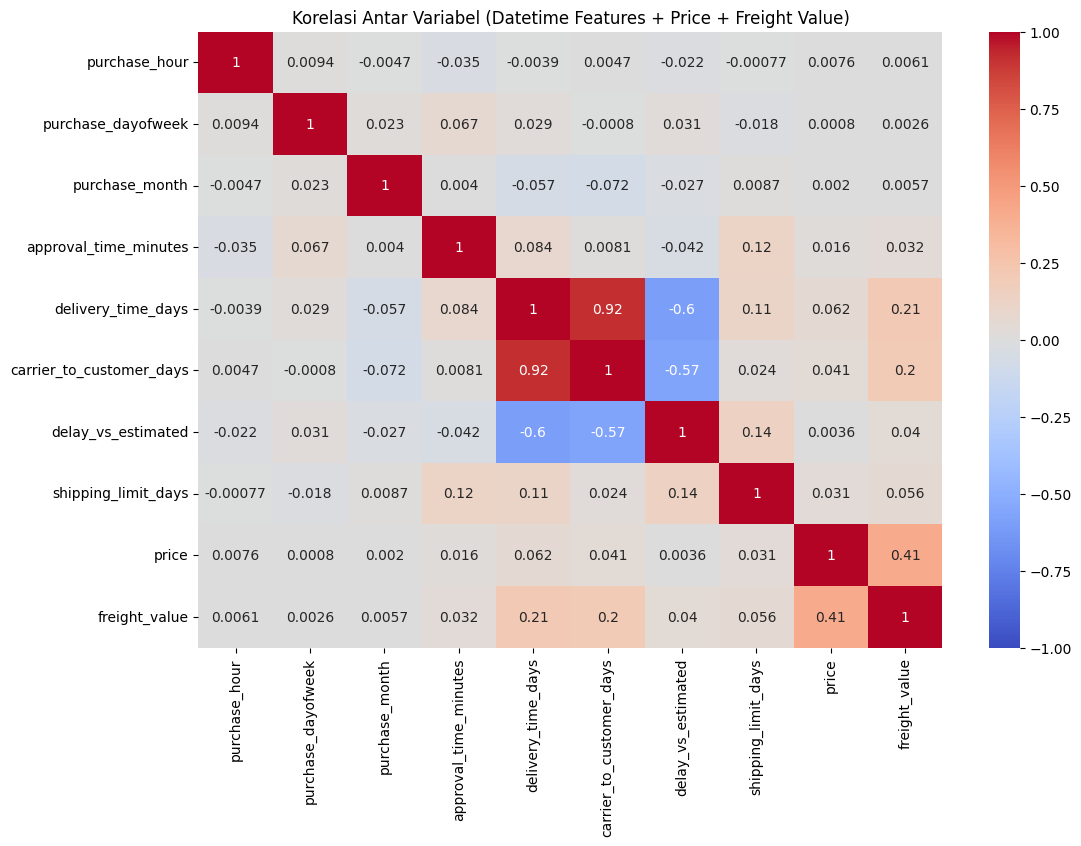

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih fitur turunan datetime + harga & ongkir
features_for_corr = [
    'purchase_hour',
    'purchase_dayofweek',
    'purchase_month',
    'approval_time_minutes',
    'delivery_time_days',
    'carrier_to_customer_days',
    'delay_vs_estimated',
    'shipping_limit_days',
    'price',
    'freight_value'
]

# Ambil subset data
corr_data = review_orders[features_for_corr]

# Hitung korelasi
corr_matrix = corr_data.corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Antar Variabel (Datetime Features + Price + Freight Value)")
plt.show()


Tidak ada korelasi signifikan yang mengejutkan selain hubungan yang memang logis (durasi pengiriman ↔ keterlambatan, harga ↔ ongkir)

# **5. Explanatory Data Analysis**

Untuk memahami kesehatan finansial bisnis e-commerce, saya akan menghitung total pendapatan kotor (GMV), jumlah transaksi, AOV, dan rata-rata waktu antar pesanan dari 2016 hingga 2018 untuk mengevaluasi pertumbuhan dan efisiensi penjualan.

In [ ]:
duckdb.sql("""
CREATE OR REPLACE TABLE yearly AS
    SELECT
        EXTRACT(year FROM order_purchase_timestamp) AS year,
        SUM(price) AS gmv,
        COUNT(order_id) AS total_orders,
        COUNT(DISTINCT order_id) AS unique_orders
    FROM olist
    WHERE order_purchase_timestamp >= '2016-01-01'
      AND order_purchase_timestamp < '2019-01-01'
    GROUP BY year
    ORDER BY year;
""")
duckdb.sql("""
CREATE OR REPLACE TABLE with_aov AS
    SELECT
        year,
        gmv,
        total_orders,
        unique_orders,
        ROUND(gmv::DOUBLE / NULLIF(unique_orders,0), 2) AS aov
    FROM yearly;
""")
duckdb.sql("""
CREATE OR REPLACE TABLE with_growth AS
    SELECT
        year,
        gmv,
        total_orders,
        unique_orders,
        aov,
        ROUND((gmv - LAG(gmv) OVER (ORDER BY year)) * 100.0 / NULLIF(LAG(gmv) OVER (ORDER BY year),0), 2) AS gmv_yoy_growth,
        ROUND((aov - LAG(aov) OVER (ORDER BY year)) * 100.0 / NULLIF(LAG(aov) OVER (ORDER BY year),0), 2) AS aov_yoy_growth
    FROM with_aov;
""")
duckdb.sql("""
CREATE OR REPLACE TABLE overall AS
    SELECT
        'Overall' AS year,
        SUM(gmv) AS gmv,
        SUM(total_orders) AS total_orders,
        SUM(unique_orders) AS unique_orders,
        ROUND(SUM(gmv)::DOUBLE / NULLIF(SUM(unique_orders),0), 2) AS aov,
        NULL AS gmv_yoy_growth,
        NULL AS aov_yoy_growth
    FROM with_growth;
""")

query = """SELECT * FROM with_growth
UNION ALL
SELECT * FROM overall;
"""

df_summary = duckdb.sql(query).to_df()

# Format numeric columns to currency
numeric_cols = df_summary.select_dtypes(include=['number']).columns
for col in numeric_cols:
    # Format growth columns as percentages, others as currency
    if 'growth' in col:
        df_summary[col] = df_summary[col].apply(lambda x: f"{x:,.2f}%" if pd.notnull(x) else '')
    else:
        df_summary[col] = df_summary[col].apply(lambda x: f"{x:,.2f}")

print(df_summary)

      year            gmv total_orders unique_orders     aov gmv_yoy_growth  \
0     2016      41,087.17       323.00        272.00  151.06                  
1     2017   5,962,426.71    49,553.00     43,425.00  137.30     14,411.65%   
2     2018   7,217,202.23    60,319.00     52,778.00  136.75         21.04%   
3  Overall  13,220,716.11   110,195.00     96,475.00  137.04                  

  aov_yoy_growth  
0                 
1         -9.11%  
2         -0.40%  
3                 


2016-2017: Explosive Growth Phase
* GMV melonjak dari 41K ke 5.96M = 14,411% growth!
* Ini menunjukkan bisnis berhasil menemukan product-market fit yang sangat kuat
* Orders naik dari 323 ke 49,553 - scaling yang fantastis

2017-2018: Maturity & Consolidation
* Growth melambat menjadi 21% (masih sangat sehat untuk mature startup growth)
* GMV mencapai $7.2M - pertumbuhan yang sustainable

AOV Strategy Insight:
* 2016: 151 → 2017: 137 (-9.11%) → 2018: $136.75 (-0.40%)
* Deliberate pricing strategy untuk customer acquisition & user base expansion
* Trade-off antara AOV dan volume acquisition - dan mereka pilih volume
* Strategy ini brilliant karena total revenue tetap naik signifikan

NOTE:

Product-Market Fit (PMF) = kondisi ketika produk yang kamu buat sangat cocok dengan kebutuhan pasar yang ada.

Definisi Sederhana:
"You've built something that people really want and are willing to pay for"

---

Customer Acquisition

Definisi: Strategi untuk mendapatkan pelanggan baru sebanyak-banyaknya

Taktik umum:
* Harga promosi/diskon untuk first-time buyers
* Free trial atau sampling
* Referral program
* Marketing campaign aggressive

Metric: Customer Acquisition Cost (CAC) - berapa biaya untuk dapat 1 customer bar

Volume Acquisition

Definisi: Strategi fokus untuk meningkatkan jumlah penjualan/transaksi sebanyak-banyaknya

Karakteristik:
* Harga lebih rendah untuk menarik lebih banyak pembeli
* Margin profit per item lebih kecil, tapi total profit bisa lebih besar karena volume tinggi
* Target: jual banyak dengan harga terjangkau

Contoh:
* Indomaret/Alfamart (harga murah, volume tinggi)
* Shopee dengan flash sale dan gratis ongkir

Premium Pricing

Definisi: Strategi menetapkan harga tinggi untuk positioning produk sebagai berkualitas tinggi/eksklusif

Karakteristik:
* Margin profit per item tinggi
* Target customer dengan daya beli tinggi
* Volume penjualan lebih rendah
* Focus pada brand image dan kualitas

Contoh:
* iPhone vs Android murah
* Starbucks vs warung kopi
* Mercedes vs Toyota

Deliberate Strategy

Artinya:
* Sengaja turunkan harga untuk menarik lebih banyak customer
* Trade-off yang diperhitungkan: lower margin per transaction vs higher volume
* Goal: mass market penetration (reach sebanyak mungkin orang)

User base expansion = memperbesar jumlah user/customer yang menggunakan platform.
* User base = total people using the platform
* Customer base = total people who made purchases
* Di e-commerce, user biasanya = customer

In [ ]:
cek = duckdb.sql("SELECT COUNT(DISTINCT customer_unique_id) FROM olist").to_df()
cek

,count(DISTINCT customer_unique_id)
0,93355


93K+ unique customers = good user acquisition progress, menunjukkan solid user base untuk growth-stage B2B2C platform



In [ ]:
cek = duckdb.sql("SELECT COUNT(DISTINCT order_id) FROM olist").to_df()
cek

,count(DISTINCT order_id)
0,96475


* Ada gap antara total transaksi (110.195) vs transaksi unik (96.475), artinya ada sekitar 13.720 transaksi repeat dari customer yang sama
* Tingkat repeat purchase sekitar 14% - ini sebenarnya bagus karena menunjukkan customer loyalty

In [ ]:
query = """ SELECT
  total_orders,
  COUNT(*) AS num_customers
FROM (
  SELECT customer_unique_id, COUNT(DISTINCT order_id) AS total_orders
  FROM olist
  GROUP BY customer_unique_id
)
GROUP BY total_orders
ORDER BY total_orders;
"""
review_orders = duckdb.sql(query).to_df()
review_orders

,total_orders,num_customers
0,1,90554
1,2,2573
2,3,181
3,4,28
4,5,9
5,6,5
6,7,3
7,9,1
8,15,1


Dalam dataset, 1 transaksi customer bisa pecah menjadi beberapa order_id walaupun checkout di hari yang sama.

In [ ]:
duckdb.sql("""
-- 1) Bangun tabel order-level (hindari join ke order_items)
CREATE OR REPLACE TABLE order_header AS
SELECT DISTINCT
  o.order_id,
  c.customer_unique_id,
  o.order_purchase_timestamp::TIMESTAMP AS order_purchase
FROM orders o
JOIN customers c
  ON o.customer_id = c.customer_id""")

duckdb.sql("""
-- 2) (Opsional) Cek apakah ada duplikat order_id (harusnya 0 baris)
SELECT order_id, COUNT(*) AS n
FROM order_header
GROUP BY order_id
HAVING COUNT(*) > 1""")

duckdb.sql("""
-- 3) Tabel repeat yang benar (urutkan deterministik jika timestamp sama)
CREATE OR REPLACE TABLE repeatsr AS
SELECT
  customer_unique_id,
  order_id,
  order_purchase,
  LEAD(order_id) OVER (
    PARTITION BY customer_unique_id
    ORDER BY order_purchase, order_id
  ) AS next_order_id,
  LEAD(order_purchase) OVER (
    PARTITION BY customer_unique_id
    ORDER BY order_purchase, order_id
  ) AS next_order_date
FROM order_header""")

query = ("""
-- 4) Ringkasan repeat (overall & real repeat)
SELECT
  COUNT(*)                                 AS total_pairs,
  COUNT(*) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) = 0)  AS same_day_pairs,
  100.0 * COUNT(*) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) = 0) / COUNT(*) AS pct_same_day,
  COUNT(*) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) > 0)  AS real_pairs,
  100.0 * COUNT(*) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) > 0) / COUNT(*) AS pct_real,
  AVG(DATEDIFF('day', order_purchase, next_order_date)) FILTER (WHERE next_order_date IS NOT NULL) AS avg_all_gaps,
  MEDIAN(DATEDIFF('day', order_purchase, next_order_date)) FILTER (WHERE next_order_date IS NOT NULL) AS median_all_gaps,
  AVG(DATEDIFF('day', order_purchase, next_order_date)) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) > 0) AS avg_real_gap_days,
  MEDIAN(DATEDIFF('day', order_purchase, next_order_date)) FILTER (WHERE DATEDIFF('day', order_purchase, next_order_date) > 0) AS median_real_gap_days
FROM repeatsr
WHERE next_order_date IS NOT NULL;""")

review_orders = duckdb.sql(query).to_df()
review_orders

,total_pairs,same_day_pairs,pct_same_day,real_pairs,pct_real,avg_all_gaps,median_all_gaps,avg_real_gap_days,median_real_gap_days
0,3120,890,28.525641,2230,71.474359,79.147436,29.0,110.735426,69.0


In [ ]:
query = """
SELECT
  COUNT(DISTINCT order_id) AS total_pairs,
  COUNT(DISTINCT customer_unique_id) AS total_customers,
  AVG(DATEDIFF('day', order_purchase, next_order_date)) AS avg_days_between_orders,
  MEDIAN(DATEDIFF('day', order_purchase, next_order_date)) AS median_days_between_orders
FROM repeatsr
WHERE next_order_date IS NOT NULL;
"""
review_orders = duckdb.sql(query).to_df()
review_orders

,total_pairs,total_customers,avg_days_between_orders,median_days_between_orders
0,3120,2801,79.147436,29.0


In [ ]:
query = ("""
-- ringkasan per-customer: apakah punya same-day pair / real pair
SELECT
  COUNT(*) AS total_customers_with_pairs,            -- total customers yang punya minimal 1 pair
  SUM(has_same) AS same_day_customers,               -- jumlah customer yang punya >=1 same-day pair
  SUM(has_real) AS real_customers,                   -- jumlah customer yang punya >=1 real (>0 hari) pair
  SUM(CASE WHEN has_same=1 AND has_real=0 THEN 1 ELSE 0 END) AS only_same_day_customers,
  SUM(CASE WHEN has_same=0 AND has_real=1 THEN 1 ELSE 0 END) AS only_real_customers,
  SUM(CASE WHEN has_same=1 AND has_real=1 THEN 1 ELSE 0 END) AS both_types_customers,
  ROUND(100.0 * SUM(CASE WHEN has_same=1 AND has_real=0 THEN 1 ELSE 0 END) / NULLIF(COUNT(*),0), 2) AS pct_only_same,
  ROUND(100.0 * SUM(CASE WHEN has_same=0 AND has_real=1 THEN 1 ELSE 0 END) / NULLIF(COUNT(*),0), 2) AS pct_only_real,
  ROUND(100.0 * SUM(CASE WHEN has_same=1 AND has_real=1 THEN 1 ELSE 0 END) / NULLIF(COUNT(*),0), 2) AS pct_both
FROM (
  SELECT
    customer_unique_id,
    MAX(CASE WHEN DATEDIFF('day', order_purchase, next_order_date) = 0 THEN 1 ELSE 0 END) AS has_same,
    MAX(CASE WHEN DATEDIFF('day', order_purchase, next_order_date) > 0 THEN 1 ELSE 0 END) AS has_real
  FROM repeatsr
  WHERE next_order_date IS NOT NULL
  GROUP BY customer_unique_id
) t -- Subquery t memberi 1 baris per customer dengan flag has_same / has_real (0/1)
""")

review_orders = duckdb.sql(query).to_df()
# anggap repeat_summary dari query tadi (1 baris, banyak kolom)
repeat_summary_long = review_orders.melt(
    var_name="metric",
    value_name="value"
)
repeat_summary_long


,metric,value
0,total_customers_with_pairs,2801.00
1,same_day_customers,854.00
2,real_customers,2015.00
3,only_same_day_customers,786.00
4,only_real_customers,1947.00
5,both_types_customers,68.00
6,pct_only_same,28.06
7,pct_only_real,69.51
8,pct_both,2.43


**Order**

Total pasangan pairs = 3120

Kalau hasilnya = 0 hari → berarti dua order itu terjadi di tanggal kalender yang sama.

Real pairs (>0 hari) = 2230 (≈ 71,5%)
👉 mayoritas repeat order ternyata di hari yang berbeda

same_day_pairs = jumlah pasangan order yang jatuh di hari yang sama

Same-day pairs = 890 (≈ 28,5%)
👉 hanya sebagian kecil customer yang benar-benar balik belanja di hari yang sama.

Average real repeat gap ≈ 110 hari (3,5 bulan)

Median real repeat gap ≈ 69 hari (2 bulan lebih sedikit)

Interpretasi:

Cukup panjang: Ini menunjukkan bahwa pelanggan biasanya menunggu lebih dari 3,5 bulan sebelum melakukan pembelian ulang.

Bisa jadi wajar, tergantung jenis produk. Misalnya: Produk konsumsi harian → waktu ini terlalu lama. Produk fashion, elektronik, atau furnitur → ini bisa dianggap normal.

**Customer**

real_customers = semua yang pernah repeat > 0 hari (termasuk overlap dengan same-day).

only_real_customers = murni repeat > 0 hari, tidak termasuk same-day.

68 customers memiliki setidaknya satu same-day pair dan setidaknya satu real (>0 hari) pair. Itu menjelaskan kenapa penjumlahan 854 + 2015 = 2869 tidak sama dengan 2801.

2801 = total unique customers yang punya minimal 1 repeat order pair (apa pun jenisnya). Artinya mereka pernah beli lebih dari sekali, entah di hari yang sama (same-day repeat / split order), atau beda hari (real repeat), atau kombinasi keduanya.

Kalau bicara “loyal”: yang lebih relevan adalah angka 2015 real repeat customers (karena mereka memang balik lagi di hari berbeda).

**Kenapa ini penting?**

* Karena di dataset ini, sangat banyak order yang kelihatan “repeat” padahal hanya dipecah oleh sistem di hari yang sama.
Itu bukan “repeat order beneran” dari sisi perilaku pelanggan, tapi split transaksi (misalnya beli dari seller berbeda).
* Jumlah pairs = jumlah orders - 1 (per customer).
Kalau customer hanya belanja 1x → tidak punya pair sama sekali.
* avg_all_gaps artinya:
👉 “Rata-rata waktu antar pesanan untuk semua pasangan order di dataset.”
* Split order di konteks marketplace bukan karena beda akun, tapi karena satu customer (satu akun) bisa punya beberapa seller dalam sekali checkout.
* same_day_customers dan real_customers bukan saling eksklusif. Satu customer bisa punya keduanya (mis. ada satu kali split-order di hari yang sama dan dia juga pernah repeat di hari lain).
Jadi normal kalau same_day_customers + real_customers > total_customers — itu cuma berarti ada overlap.

📌 Interpretasi:

Jadi kalau mau analisis customer retention atau lifetime value, sebaiknya exclude same-day repeat (anggap itu transaksi yang sama).

Dari 100 customer yang ada, hanya 2 yang benar-benar melakukan repeat order.

Pola repeat yang nyata (2–3 bulan) lebih masuk akal untuk e-commerce yang bukan groceries sehari-hari.

Untuk menganalisis perilaku dan retensi pelanggan, saya akan melakukan cohort analysis terhadap data pelanggan selama 2016 hingga 2018 untuk mengukur tingkat retensi kuartal dan tren pembelian berulang.

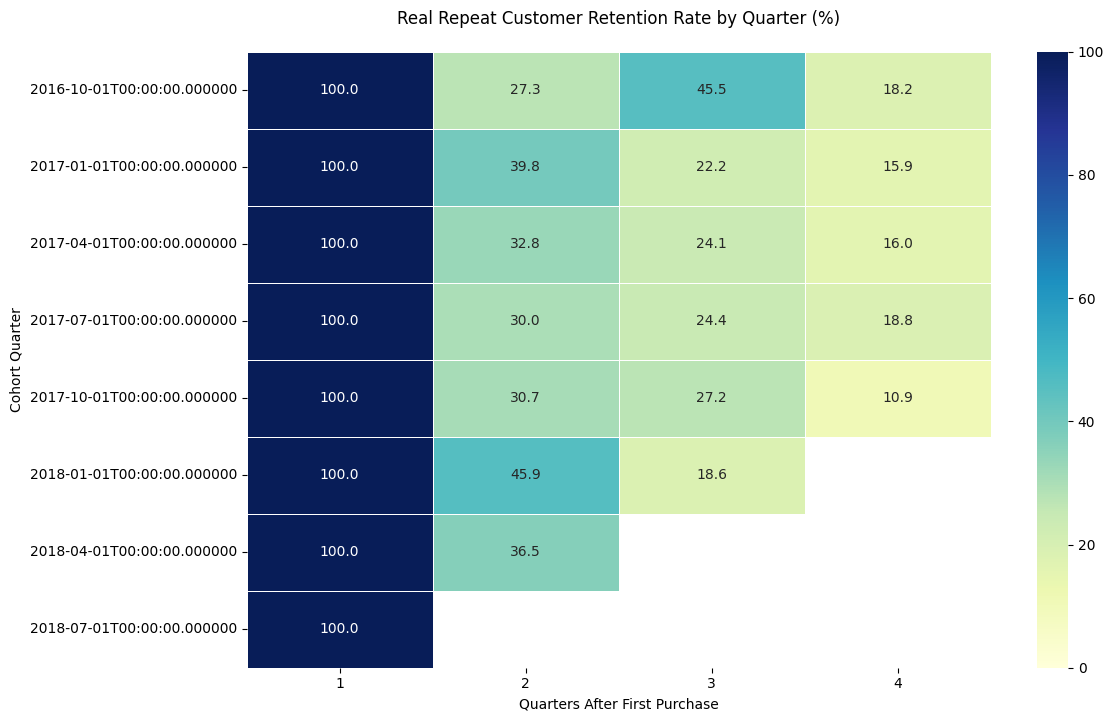

In [ ]:
# 1. Tentukan first purchase quarter khusus real repeat customers
duckdb.sql("""
CREATE OR REPLACE TABLE real_repeat_customers AS
SELECT DISTINCT customer_unique_id
FROM repeatsr
WHERE next_order_date IS NOT NULL
  AND DATEDIFF('day', order_purchase, next_order_date) > 0
""")

duckdb.sql("""
CREATE OR REPLACE TABLE first_real_repeat_purchases AS
    SELECT
        c.customer_unique_id,
        MIN(DATE_TRUNC('quarter', o.order_purchase_timestamp::TIMESTAMP)) AS cohort_quarter
    FROM olist o
    JOIN customers c ON o.customer_id = c.customer_id
    JOIN real_repeat_customers rr ON c.customer_unique_id = rr.customer_unique_id
    WHERE o.order_status = 'delivered'
    GROUP BY c.customer_unique_id
""")

# 2. Hitung ukuran cohort (hanya real repeat customers)
duckdb.sql("""
CREATE OR REPLACE TABLE cohort_size_real AS
    SELECT
        cohort_quarter,
        COUNT(DISTINCT customer_unique_id) AS total_customers
    FROM first_real_repeat_purchases
    GROUP BY cohort_quarter
""")

# 3. Hitung retention per quarter (hanya real repeat customers)
duckdb.sql("""
CREATE OR REPLACE TABLE retention_data_real AS
    SELECT
        fp.cohort_quarter,
        EXTRACT(QUARTER FROM AGE(DATE_TRUNC('quarter', o.order_purchase_timestamp::TIMESTAMP), fp.cohort_quarter)) AS quarter_number,
        COUNT(DISTINCT fp.customer_unique_id) AS retained_customers
    FROM olist o
    JOIN customers c ON o.customer_id = c.customer_id
    JOIN first_real_repeat_purchases fp ON c.customer_unique_id = fp.customer_unique_id
    WHERE o.order_status = 'delivered'
    GROUP BY fp.cohort_quarter, quarter_number
""")

# 4. Hitung persentase retention
cohort_query_real = """
SELECT
    r.cohort_quarter,
    r.quarter_number,
    r.retained_customers,
    cs.total_customers,
    (r.retained_customers::FLOAT / cs.total_customers) * 100 AS retention_rate
FROM retention_data_real r
JOIN cohort_size_real cs ON r.cohort_quarter = cs.cohort_quarter
ORDER BY r.cohort_quarter, r.quarter_number
"""

cohort_data_real = duckdb.sql(cohort_query_real).df()

# 5. Heatmap
retention_matrix_real = cohort_data_real.pivot_table(
    index='cohort_quarter',
    columns='quarter_number',
    values='retention_rate'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix_real,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    vmin=0,
    vmax=100,
    linewidths=0.5
)
plt.title('Real Repeat Customer Retention Rate by Quarter (%)', pad=20)
plt.xlabel('Quarters After First Purchase')
plt.ylabel('Cohort Quarter')
plt.show()

In [ ]:
cohort_query_real = """
SELECT
    r.cohort_quarter,
    r.quarter_number,
    r.retained_customers,
    cs.total_customers,
    ROUND((r.retained_customers::FLOAT / cs.total_customers) * 100, 1) AS retention_rate
FROM retention_data_real r
JOIN cohort_size_real cs
  ON r.cohort_quarter = cs.cohort_quarter
ORDER BY r.cohort_quarter, r.quarter_number
"""

cohort_data_real = duckdb.sql(cohort_query_real).df()
# save cohort_data_real to excel
cohort_data_real.to_excel('cohort_data_real.xlsx', index=False)
cohort_data_real


,cohort_quarter,quarter_number,retained_customers,total_customers,retention_rate
0,2016-10-01,1,11,11,100.000000
1,2016-10-01,2,3,11,27.299999
2,2016-10-01,3,5,11,45.500000
3,2016-10-01,4,2,11,18.200001
4,2017-01-01,1,176,176,100.000000
5,2017-01-01,2,70,176,39.799999
6,2017-01-01,3,39,176,22.200001
7,2017-01-01,4,28,176,15.900000
8,2017-04-01,1,344,344,100.000000
9,2017-04-01,2,113,344,32.799999


Bisnis menunjukkan pertumbuhan customer base yang solid dan retention rate 26% yang reasonable untuk model B2B2C marketplace, dengan tren improvement di cohorts 2018.

Penjelasan yang lebih clear:


* Customer base tumbuh dari 11 (Q4 2016) ke 74 (Q3 2018)
* Q2 Average:
(27.3 + 39.8 + 32.8 + 30.0 + 30.7 + 45.9 + 36.5) ÷ 7 = 34.7%
* Q3 Average:
(45.5 + 22.2 + 24.1 + 24.4 + 27.2 + 18.6) ÷ 6 = 27.0%
* Q4 Average:
(18.2 + 15.9 + 16.0 + 18.8 + 10.9) ÷ 5 = 15.96%
* Overall Average Retention:
(34.7 + 27.0 + 15.96) ÷ 3 = 25.9%
* Retention rate 26% artinya: dari setiap 100 customers baru, rata-rata 26 akan tetap aktif di quarters berikutnya
* 26% retention reasonable untuk marketplace B2B2C karena customer loyalty cenderung ke individual sellers
* 2018 = maturation period dimana bisnis shifted from pure growth ke sustainable retention focus.

Untuk mengevaluasi kinerja operasional dan mitra (penjual), saya akan menilai tren penjualan musiman dengan membandingkan volume penjualan bulanan dari 2017 hingga 2018 untuk mengidentifikasi pola temporal.

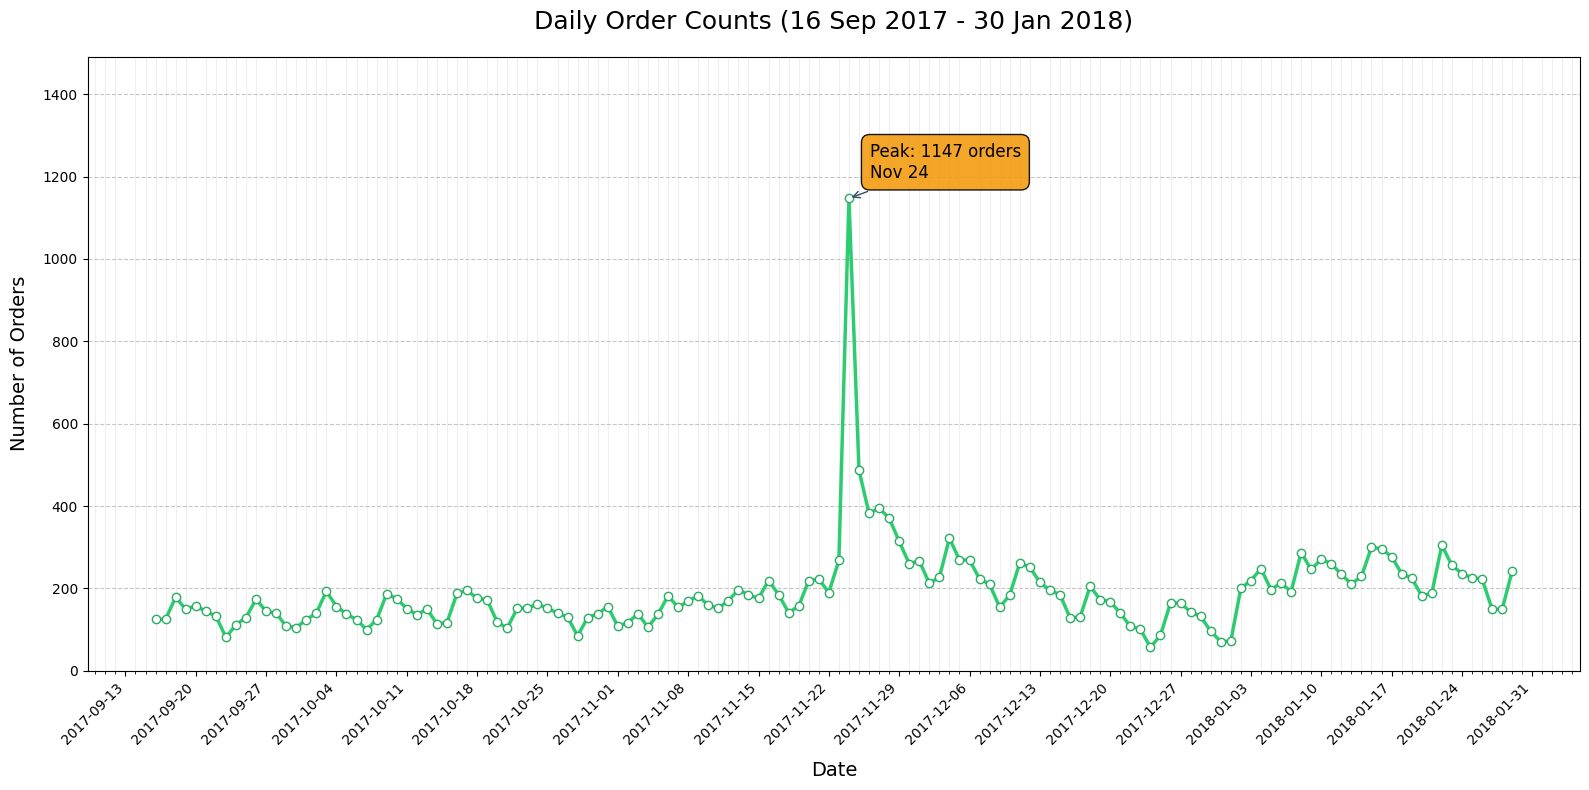

In [ ]:
# Menghitung tren penjualan musiman
import matplotlib.dates as mdates
from datetime import datetime

# Query for daily order counts
daily_orders_query = """
SELECT
    order_purchase_timestamp::DATE AS order_date,
    COUNT(DISTINCT order_id) AS order_count
FROM olist
WHERE
    order_purchase_timestamp BETWEEN '2017-09-16' AND '2018-01-30'
    AND order_status = 'delivered'
GROUP BY order_date
ORDER BY order_date
"""

daily_orders = duckdb.sql(daily_orders_query).df()
daily_orders['order_date'] = pd.to_datetime(daily_orders['order_date'])

# Visualization
plt.figure(figsize=(16, 8))

# Plot with all dates shown
plt.plot(
    daily_orders['order_date'],
    daily_orders['order_count'],
    marker='o',
    markersize=6,
    color='#2ecc71',  # Emerald green
    linewidth=2.5,
    markeredgecolor='#27ae60',
    markerfacecolor='white'
)

# Configure x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Show every 7 days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# Expand y-axis range (add 10% buffer)
y_max = daily_orders['order_count'].max()
plt.ylim([0, y_max * 1.3])  # 10% headroom

# Styling
plt.title('Daily Order Counts (16 Sep 2017 - 30 Jan 2018)', fontsize=18, pad=20)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Number of Orders', fontsize=14, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight important points
max_order = daily_orders['order_count'].max()
max_date = daily_orders.loc[daily_orders['order_count'].idxmax(), 'order_date']
plt.annotate(
    f'Peak: {max_order} orders\n{max_date.strftime("%b %d")}',
    xy=(max_date, max_order),
    xytext=(15, 15),
    textcoords='offset points',
    bbox=dict(boxstyle='round,pad=0.5', fc='#f39c12', alpha=0.9),
    fontsize=12,
    arrowprops=dict(arrowstyle='->', color='#34495e')
)

# Add minor ticks for better readability
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()

Output menunjukkan bisnis berhasil capitalize momentum Black Friday Brazil, artinya event itu berhasil acquire new customers yang stick around. Ini shows bisnis beginning to mature sebagai platform di Brazilian e-commerce landscape.

"Stick Around" Effect:

* Event berhasil acquire customers baru
* Customers ini tidak langsung churn after event selesai
* Mereka tetap aktif - continue shopping
* Platform retain mereka better than sebelumnya

Why "Stick Around" Important:

* Banyak promo events cuma temporary spike - customers datang, beli sekali, terus hilang
* Good event = customers stay and become regular users
* Shows platform value proposition beyond just discount

Analogy:
Seperti grand opening resto - ramai karena promo, tapi yang penting: apakah customers balik lagi setelah promo habis?

Bisnis case: Event successfully converted one-time buyers jadi repeat customers - that's why retention improved di 2018 cohorts.